In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import japanize_matplotlib
import glob
import os
import csv

import time

%matplotlib inline

In [ ]:
def local_norm(array, width=50):
  if(len(array.shape)!=1 or array.size<width):
    return -1
  
  result = []
  for i in range(array.size-width):
    local_array = array[i:i+width]
    bot = local_array.min()
    top = local_array.max()
    normed = (local_array[-1]-bot)/(top-bot)
    result.append(normed)
  return np.array(result)

def center(array):
  return (array-array.min())/(array.max()-array.min())

def closestIdx(array, v):
  difference_array = np.absolute(array-v)
  return difference_array.argmin()

In [ ]:
files = glob.glob('output\\*.npz')
key = "y_stomach"
for filepath in glob.glob('output\\*.npz'):
  data = np.load(filepath)
  filename = os.path.splitext(os.path.basename(filepath))[0]
  
  with open(f'csv/{filename}.csv', 'w', newline="") as f:
    for key, values in data.items():
      writer = csv.writer(f)
      writer.writerow([key] + list(values))

In [ ]:
"""files = glob.glob('output\\*.npz')

head, end = [10, -10]
use_case = ("hanamoto2_20240723", "kojima_20240723", "ohtani_20240723", "shinhama_20240726")
area = [
  [20,60],
  [60,140],
  [20,60],
  [0,60]
]

for i, case in enumerate(use_case):
  filepath = f'output\\{case}.npz'
  data = np.load(filepath)
  filename = os.path.splitext(os.path.basename(filepath))[0]
  
  
  print(filename)
  fig = plt.figure(figsize=(16,4))
  fig.suptitle(f"student-{i}")
  plt.plot(data["t"][head:end], center(data["y_truth"][head:end]), label="preasure", color="lime")
  plt.plot(data["t"][head:end], center(data["y_stomach"][head:end]), label="stomach", color="coral")
  plt.plot(data["t"][head:end], center(data["y_chest"][head:end]), label="chest", color="steelblue")
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12)

  """

[20, 60]
[60, 140]
[20, 60]
[0, 60]


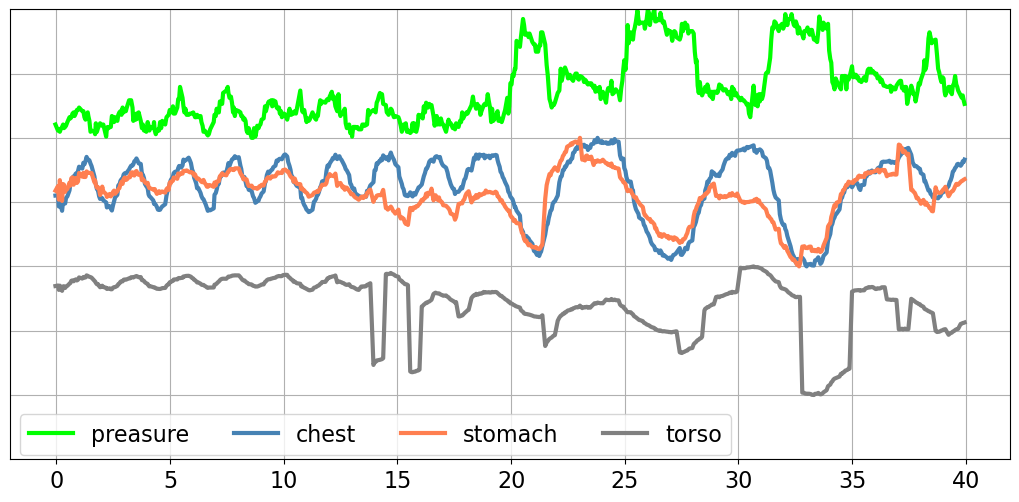

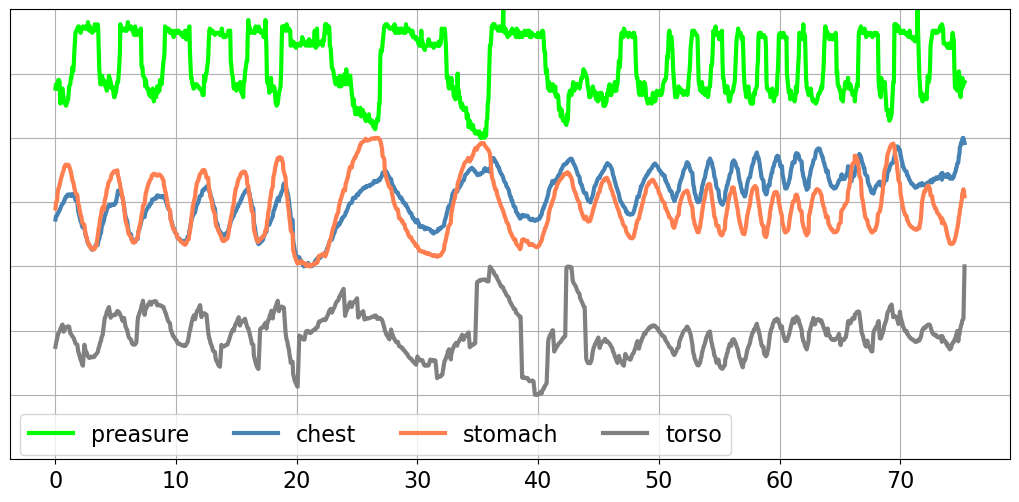

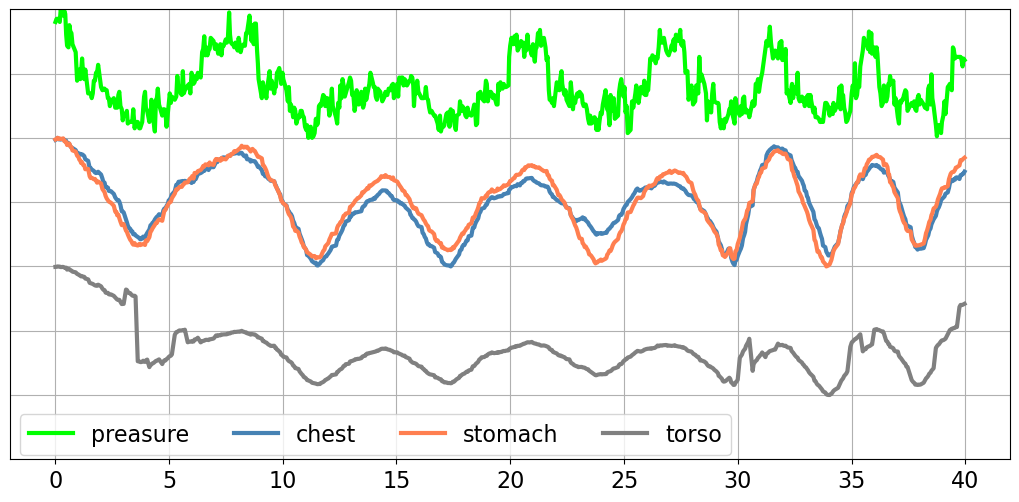

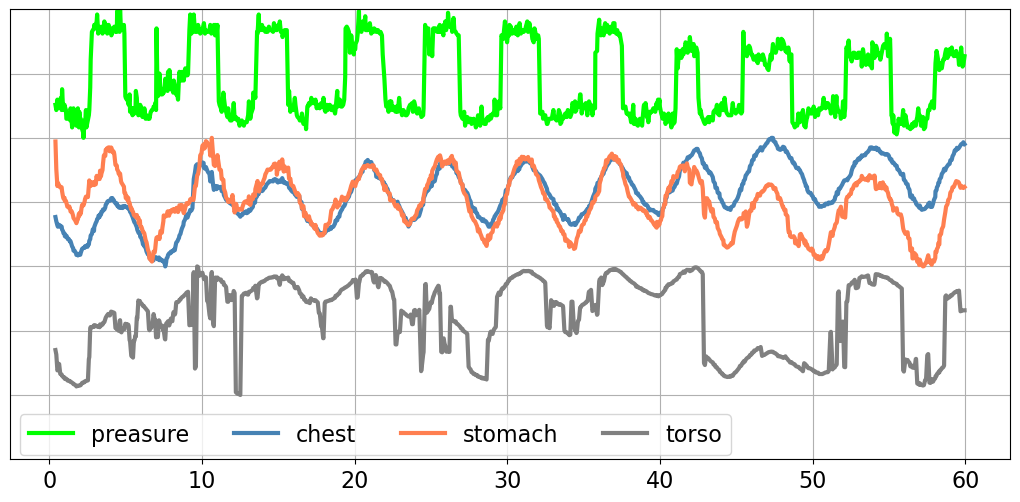

In [63]:
files = glob.glob('output\\*.npz')
use_case = ("hanamoto2_20240723", "kojima_20240723", "ohtani_20240723", "shinhama_20240726")
area = [
  [20,60],
  [60,140],
  [20,60],
  [0,60]
]
w=3
for i, case in enumerate(use_case):
  filepath = f'output\\{case}.npz'
  data = np.load(filepath)
  filename = os.path.splitext(os.path.basename(filepath))[0]
  print(area[i])
  head_s, end_s = area[i]
  head, end = [closestIdx(data["t"], head_s), closestIdx(data["t"], end_s)]
  
  fig = plt.figure(figsize=(10,5))
  #fig.suptitle(f"学生{i+1}", fontname = 'MS Gothic')
  
  plt.plot(data["t"][head:end]-head_s, center(data["y_truth"][head:end])+1, label="preasure", color="lime", lw=w)
  plt.plot(data["t"][head:end]-head_s, center(data["y_chest"][head:end]), label="chest", color="steelblue", lw=w)  
  plt.plot(data["t"][head:end]-head_s, center(data["y_stomach"][head:end]), label="stomach", color="coral", lw=w)
  plt.plot(data["t"][head:end]-head_s, center(data["y_global"][head:end])-1, label="torso", color="grey", lw=w)
  
  plt.ylim([-1.5, 2])
  plt.legend(bbox_to_anchor=(0.01, 0.1), loc='upper left', borderaxespad=0, fontsize=16, ncol=4)
  plt.grid()
  plt.tick_params(labelleft=False, left=False)
  fig.subplots_adjust(left=0, right=1, bottom=0, top=0.9)
  plt.savefig("graphs/"+f'{i+1}-{filename}.png', bbox_inches='tight', pad_inches=0.25)
  